In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr, ttest_ind

In [ ]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

df.replace(-200, np.nan, inplace=True)

df_clean = df.dropna()

# high and low pollution observations, split at median
median_co = df_clean['CO(GT)'].median()
high_pollution = df_clean[df_clean['CO(GT)'] > median_co]
low_pollution = df_clean[df_clean['CO(GT)'] <= median_co]

print("High pollution:", len(high_pollution))
print("Low pollution:", len(low_pollution))

High pollution observations: 411
Low pollution observations: 416


In [17]:
print("High Pollution Summary:")
print(high_pollution.describe())
print("\nLow Pollution Summary:")
print(low_pollution.describe())

print("\nData Info:")
print(df_clean.info())

High Pollution Summary:
           CO(GT)  PT08.S1(CO)     NMHC(GT)    C6H6(GT)  PT08.S2(NMHC)  \
count  411.000000   411.000000   411.000000  411.000000     411.000000   
mean     3.448662  1395.036496   375.751825   16.488078    1180.829684   
std      1.181263   184.191102   208.005926    6.221029     180.236620   
min      2.100000   978.000000    79.000000    7.000000     858.000000   
25%      2.600000  1267.500000   218.500000   11.900000    1045.000000   
50%      3.100000  1382.000000   319.000000   14.900000    1145.000000   
75%      4.100000  1497.000000   487.000000   19.900000    1295.000000   
max      8.100000  2040.000000  1189.000000   39.200000    1754.000000   

          NOx(GT)  PT08.S3(NOx)     NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
count  411.000000    411.000000  411.000000    411.000000   411.000000   
mean   205.902676    769.119221  124.189781   1828.399027  1342.885645   
std     67.827797    125.284429   21.091855    243.945918   299.804829   
min    102.00

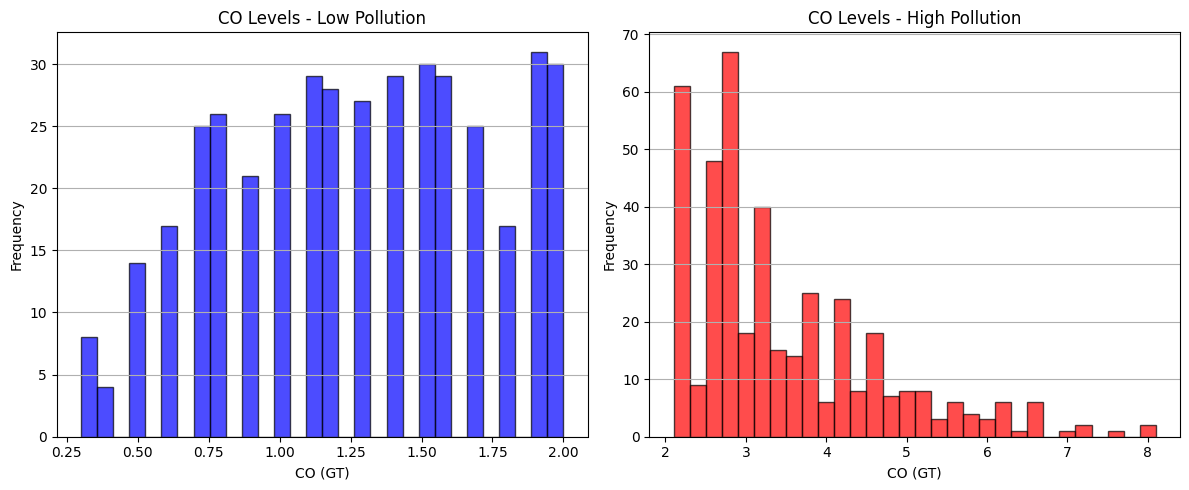

In [12]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

axs[0].hist(low_pollution['CO(GT)'], bins=30, alpha=0.7, color='blue', edgecolor='black')
axs[0].set_title('CO Levels - Low Pollution')
axs[0].set_xlabel('CO (GT)')
axs[0].set_ylabel('Frequency')
axs[0].grid(axis='y')

axs[1].hist(high_pollution['CO(GT)'], bins=30, alpha=0.7, color='red', edgecolor='black')
axs[1].set_title('CO Levels - High Pollution')
axs[1].set_xlabel('CO (GT)')
axs[1].set_ylabel('Frequency')
axs[1].grid(axis='y')

plt.tight_layout()
plt.show()

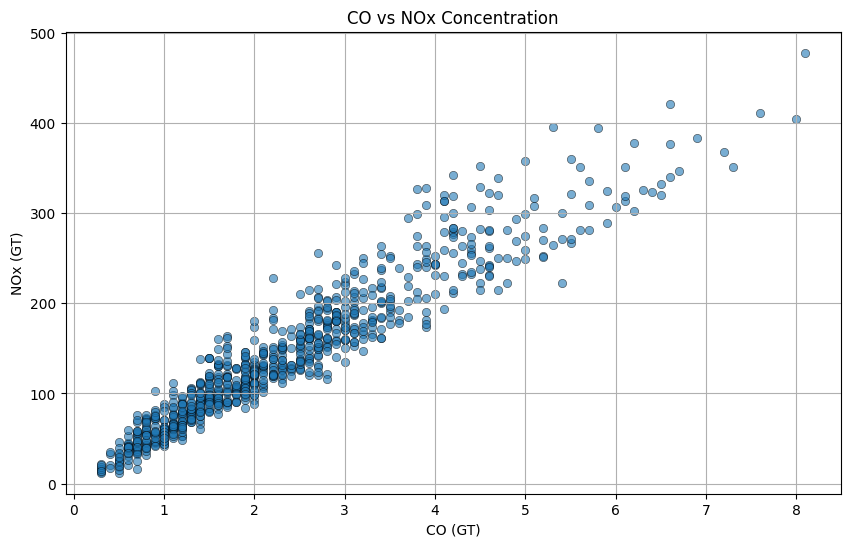

In [13]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_clean, x='CO(GT)', y='NOx(GT)', alpha=0.6, edgecolor='black')
plt.title('CO vs NOx Concentration')
plt.xlabel('CO (GT)')
plt.ylabel('NOx (GT)')
plt.grid()
plt.show()

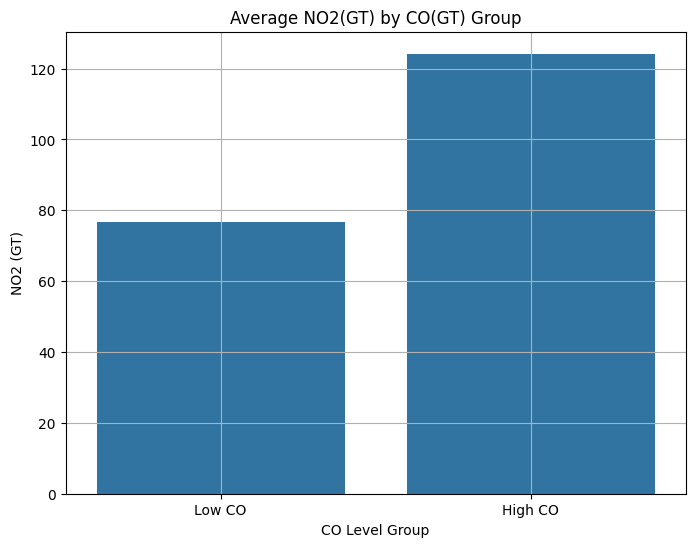

In [16]:
plt.figure(figsize=(8,6))
sns.barplot(x=['Low CO', 'High CO'], y=[low_pollution['NO2(GT)'].mean(), high_pollution['NO2(GT)'].mean()])
plt.title('Average NO2(GT) by CO(GT) Group')
plt.ylabel('NO2 (GT)')
plt.xlabel('CO Level Group')
plt.grid()
plt.show()

# Hypothesis Formulation  
Based on the above graphs and summaries, I formulated the following hypotheses:  

## Hypothesis 1  
Null Hypothesis (H0): There is no relationship between CO(GT) and NOx(GT).
Alternative Hypothesis (HA): There is a positive relationship between CO(GT) and NOx(GT).

In [14]:
correlation, p_value = spearmanr(df_clean['CO(GT)'], df_clean['NOx(GT)'])
print(f"Spearman Correlation: {correlation:.3f}, p-value: {p_value:.3e}")

Spearman Correlation: 0.962, p-value: 0.000e+00


**Results:**  
Spearman Correlation Coefficient: 0.962

p-value: 0.000e+00

**Interpretation:**  
The Spearman correlation coefficient of 0.962 indicates a very strong positive  relationship between CO and NOx levels.

The p-value being less than 0.05 provides strong evidence against the null hypothesis.

**Conclusion:**  
We reject the null hypothesis. There is a statistically significant, strong positive correlation between CO and NOx levels in the air quality dataset.

## Hypothesis 2  
Null Hypothesis (H0): The mean NO2(GT) levels are the same between high and low CO groups.
Alternative Hypothesis (HA): The mean NO2(GT) levels differ between high and low CO groups. 

In [15]:
t_stat, p_val = ttest_ind(high_pollution['NO2(GT)'], low_pollution['NO2(GT)'], equal_var=False)
print(f"T-test NO2(GT) between groups: t-stat = {t_stat:.3f}, p-value = {p_val:.3e}")

T-test NO2(GT) between groups: t-stat = 33.134, p-value = 1.344e-153


**Results:**  
T-test Statistic: 33.134

p-value: 1.344e-153

**Interpretation:**  
A t-statistic of 33.134 is beyond the threshold for significance.

The p-value is far below 0.05, indicating an extremely significant difference between groups.

**Conclusion:**  
We reject the null hypothesis. There is a highly significant difference in NO2(GT) levels between the high and low CO(GT) groups.